In [1]:
# Imports
import numpy as np
import os
from matplotlib import pyplot as plt
import h5py as h5
from PyXRIM.Corrections import Corrector
from PyXRIM.misc import  bin_ndarray
from functions import *
from decompFunctions import *
%matplotlib notebook

import pca_on_correlations as pcaC

In [2]:
#Inputs
fname = 'D:\Libraries\Documents\Materials Informatics\LiCoO2_Al2O3_20160330.hdf5'
datasets = ['S026','S027','S028'] # name of raw dataset
procRefName = 'bkg_corrected' # reference name to append to rawData

In [3]:
# open h5file
f = h5.File(fname, mode='r') 
# Always open in read mode 'r'.
# Until you're ready to write into the file. This is especially true if your OS is not Unix-based like Windows.
rawg = f['20160330/Raw']
procg = f['20160330/Process']
meta = f['20160330/Meta']

In [4]:
roi1y=slice(420,460)
roi1x=slice(500,580)
data = []
twotheta = []
for name in datasets:
    rawDset = rawg[name]
           
    procDset = f[rawDset.attrs['bkg_corrected']]   
    print procDset.shape
    data.extend(procDset[:,:,:]+10)
    twotheta.extend(rawDset.attrs['delta'])

name1 = 'S026'
rawDset1 = rawg[name1]
procDset1 = f[rawDset1.attrs['bkg_corrected']]   
name2 = 'S027'
rawDset2 = rawg[name2]
procDset2 = f[rawDset2.attrs['bkg_corrected']]   
name3 = 'S028'
rawDset3 = rawg[name3]
procDset3 = f[rawDset3.attrs['bkg_corrected']]   


#data = [procDset1[:,roi1y,roi1x]+10,procDset2[:,roi1y,roi1x]+10,procDset3[:,roi1y,roi1x]+10]
#data = [procDset1[:,:,:]+10,procDset2[:,:,:]+10,procDset3[:,:,:]+10]
#twotheta = [rawDset1.attrs['delta'],rawDset2.attrs['delta'],rawDset3.attrs['delta']]



#fig,ax = plt.subplots()
#ax.plot(twotheta,normInt,marker = 'o', markerfacecolor='r')
#ax.set_xlabel('$2\\theta$ (deg.)')
#ax.set_ylabel('$\log (Intensity) $ (arb. units)')

(41, 1024, 1024)
(36, 1024, 1024)
(11, 1024, 1024)


dataList = data
data2 = np.array([data2 for data2 in dataList])
qsize = sum([l.shape[0] for l in dataList])
xsize, ysize = dataList[0].shape[1], dataList[0].shape[-1]
print data2.shape
print qsize
print ysize
print xsize
data2 = data2.reshape(qsize, ysize, xsize)

(88L, 1024L, 1024L)
90112
1024
1024


<IPython.core.display.Javascript object>


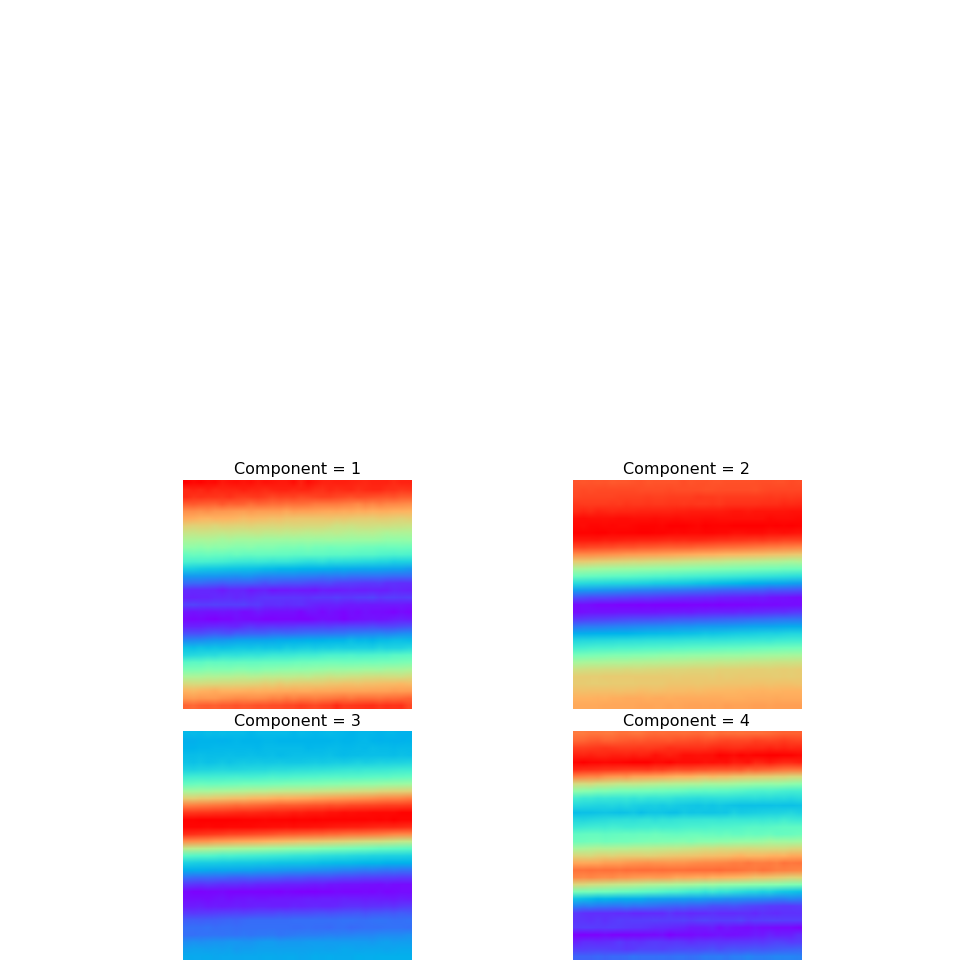

<IPython.core.display.Javascript object>


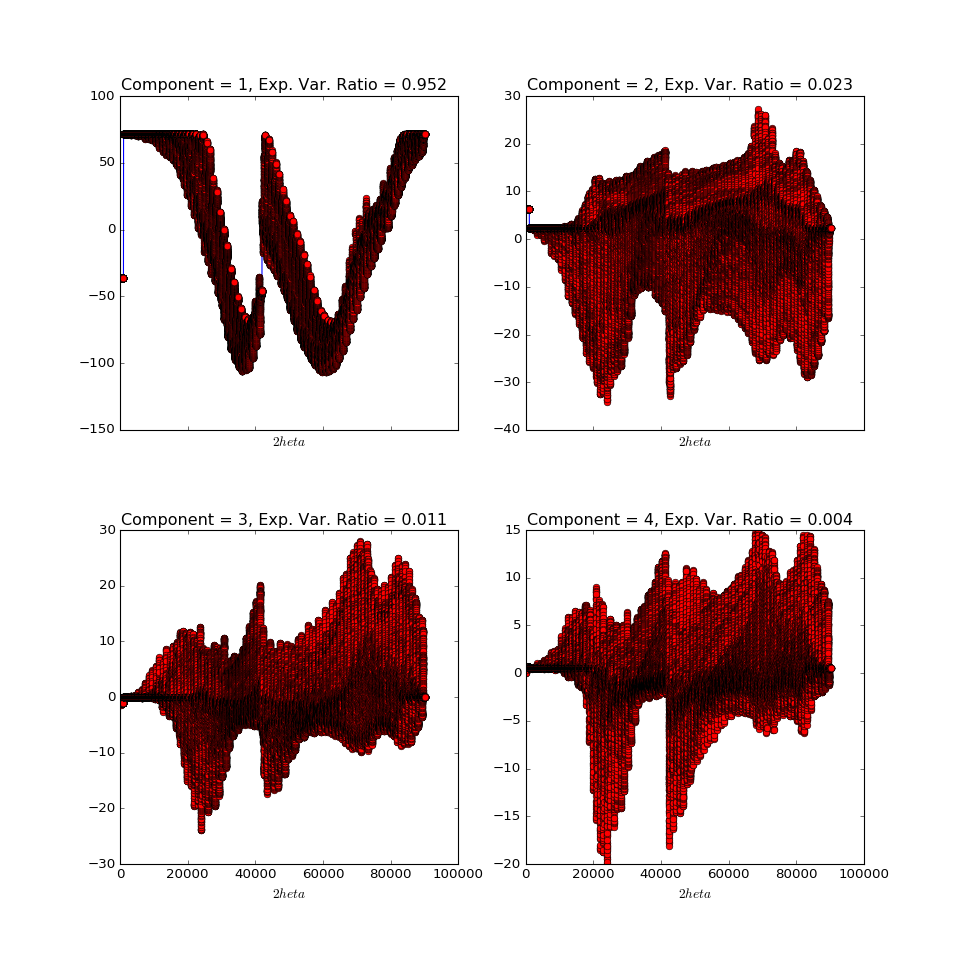

In [6]:
# PCA
xvals= twotheta
# You should do one PCA with logscaling = True and another with logscaling = False to compare.
data2 = preping(data, logscaling = True, feature_scaling=False, feature_range=(0.1,1))
# set the number of principal components we want PCA to use. Try multiple numbers.
n_comp = 4
#projec, eigenvec, var_ratio, pca = doPCA(data2, n_comp, xvals=xvals,xlabel='$2\theta$',cmap='rainbow')
projec, eigenvec, var_ratio, pca = doPCA(data2, n_comp, [],xlabel='$2\theta$',cmap='rainbow')

<IPython.core.display.Javascript object>


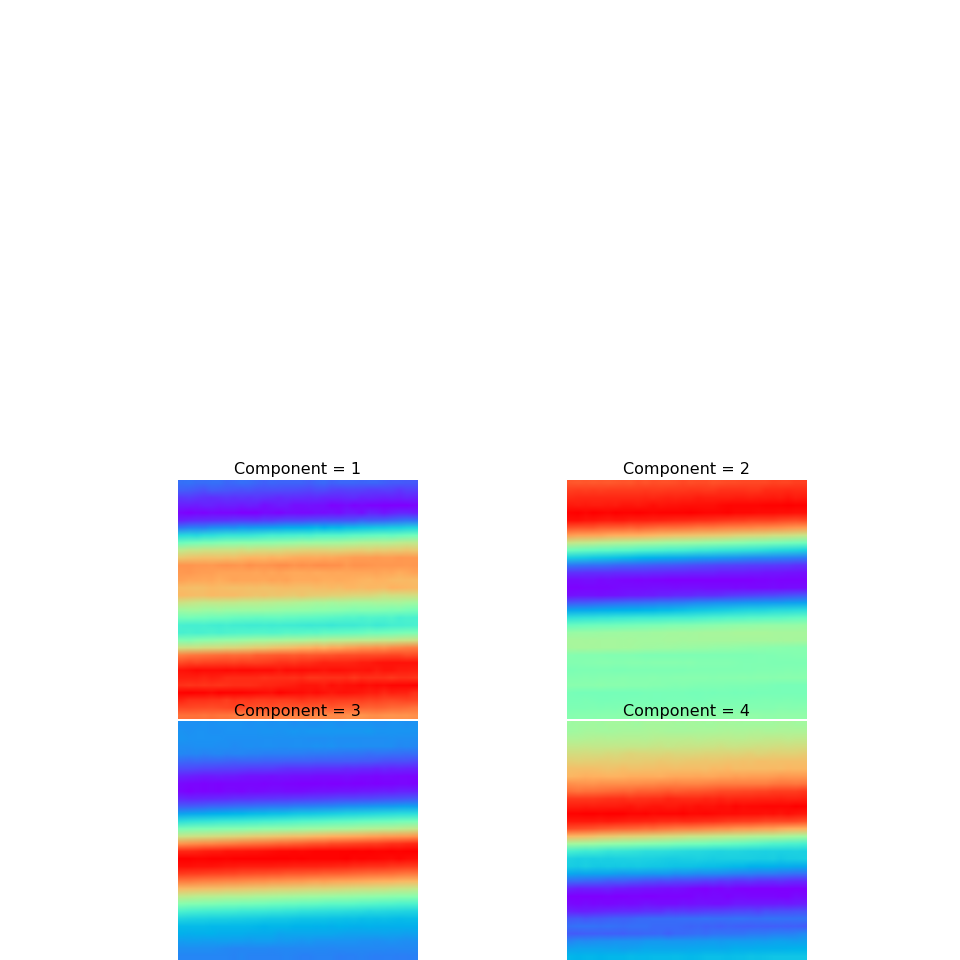

<IPython.core.display.Javascript object>


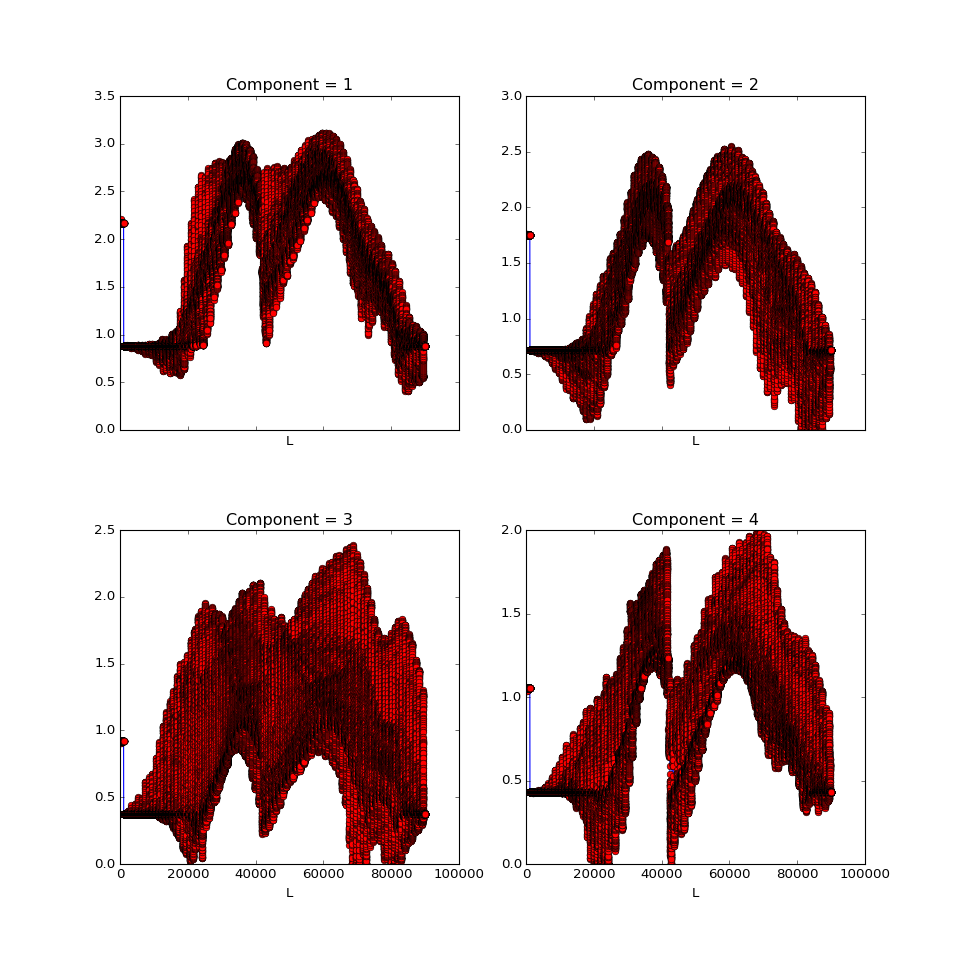

In [7]:
# Same as before, except now use NMF
n_comp = 4
#projec, eigenvec, nmf = doNMF(data2, 4, xvals=xvals,xlabel='L',cmap='rainbow')
projec, eigenvec, nmf = doNMF(data2, 4, [],xlabel='L',cmap='rainbow')